
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load PEPACS module
from pepacs.agents.pepacs import PEPACS, Configuration

# Load Metrics
from example.metrics.MazeMetrics import \
    _maze_metrics, \
    _how_many_peps_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _enhanced_effect_error

# Load Plotting Wrappers
from example.metrics.MazePlottingWrapper import \
    parse_metrics_to_df, \
    plot_performance

# Load environments
import gym
import my_mazes

# Agent - PEPACS

## Common parameters

In [2]:
#Environmental Set Up
RANDOM_ATTRIBUTE_LENGTH = 0
CLASSIFIER_LENGTH = 8 + RANDOM_ATTRIBUTE_LENGTH
NUMBER_OF_POSSIBLE_ACTIONS = 8
SLIPPERY_PROB = 0.
MAZE = "Maze10-v0"

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 5000
METRICS_TRIAL_FREQUENCY_EXPLORE = 100
EPSILON = 0.8
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_NO_RL = 500
BETA_EXPLOIT_NO_RL = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL_START = 500
BETA_EXPLOIT_RL_START = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL = 500
BETA_EXPLOIT_RL = 0.05

#RL Set Up
GAMMA = 0.95
BETA_RL = 0.05

#GA Set Up
DO_GA = True
CROSSOVER = 0.8
MUTATION = 0.3

#PEPACS Set Up
DO_ZIP = True
ENABLE_PEP = True

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Set up probability to do a random action
maze.env.set_prob_slippery(SLIPPERY_PROB)
# Set up random attribute length
maze.env.set_random_attribute_length(RANDOM_ATTRIBUTE_LENGTH)
# Reset it, by putting an agent into random position
maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')
# Get environmental state transitions
#maze.env.get_theoritical_probabilities()


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ ■ ■ ■ ■ □ ■
■ □ ■ ■ ■ A ■ □ ■
■ ■ ■ □ ■ ■ ■ ■ ■
■ ■ ■ $ ■ ■ ■ ■ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of PEPACS - Exploration

In [4]:
%%time
#%%prun -l 0.5 -T profiling.txt

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    do_ga=DO_GA,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=MUTATION,
    chi=CROSSOVER
)

agent_explore = PEPACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 3min 16s, sys: 1.29 s, total: 3min 17s
Wall time: 4min 37s


### Performance

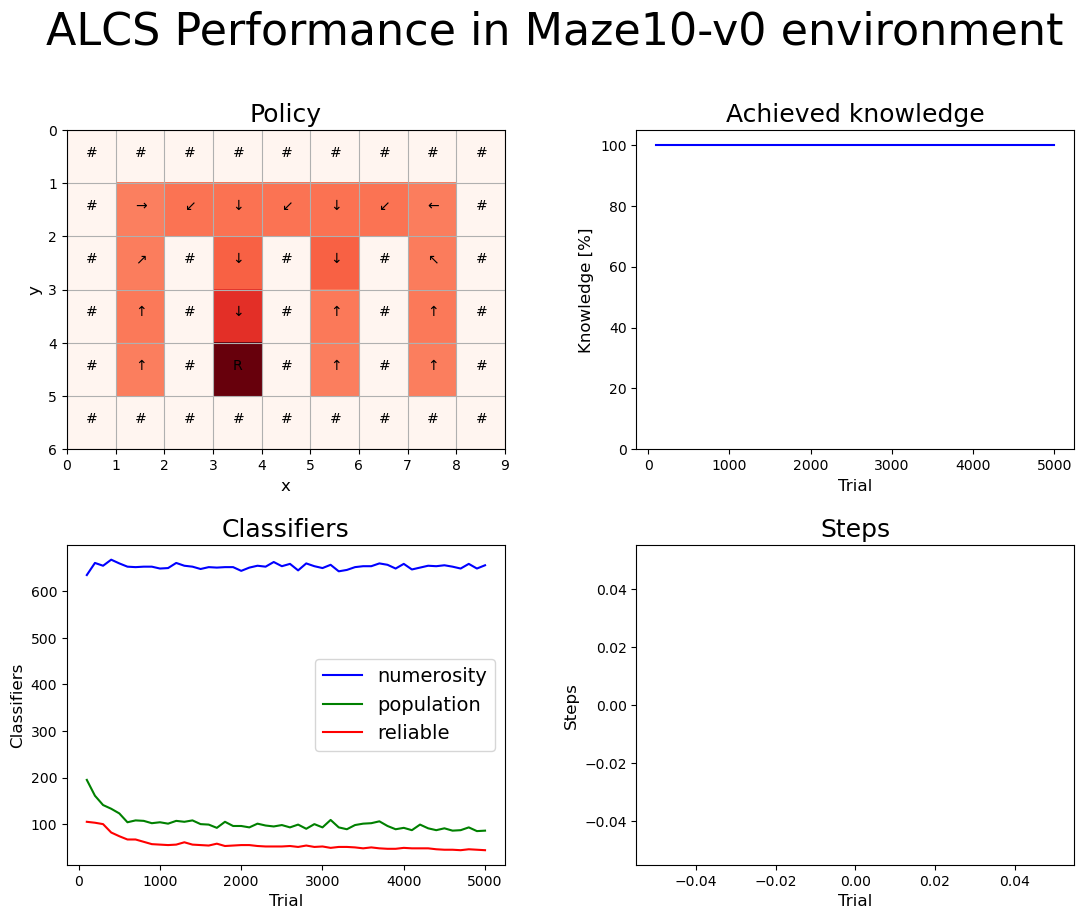

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
first_trial, stable_trial, last_trial = _when_full_knowledge_is_achieved(metrics_explore)
print("Full knowledge was achieved at trials ", first_trial, ", was stable at ", stable_trial, 
        " and the last time it was achieved at ", last_trial)

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%\n")

if DO_ZIP:
    agent_explore.zip_population()
    population_explore = agent_explore.get_population()

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%")

Full knowledge was achieved at trials  100 , was stable at  100  and the last time it was achieved at  5000
There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 86, 'numerosity': 656, 'reliable': 44}
Mean reliable population specifity is  0.3096590909090909
Accumulated Error on PEP Probabilities : 0.13660437391775268 %

There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 79, 'numerosity': 649, 'reliable': 39}
Mean reliable population specifity is  0.2692307692307692
Accumulated Error on PEP Probabilities : 0.13660437391775268 %


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

####9### 4 ####1###
q: 1.0    r: 1e+03  ir: 1e+03  f: 1e+03  
exp: 4186  num: 18 ee: False
Mark: empty
tga: 241091 talp: 241101 tav: 46.17  



#0#####0 4 #{1:100.00%}##{0:56.69%, 9:43.31%}##{1:100.00%}
q: 1.0    r: 780.4  ir: 0.0    f: 780.4  
exp: 19033 num: 17 ee: False
Mark: empty
tga: 241077 talp: 241101 tav: 11.11  



####9### 0 #0##0##0
q: 1.0    r: 727.5  ir: 0.0    f: 727.5  
exp: 2535  num: 19 ee: False
Mark: empty
tga: 240926 talp: 240957 tav: 88.19  



##0##10# 4 001###10
q: 1.0    r: 714.6  ir: 0.0    f: 714.6  
exp: 7243  num: 17 ee: False
Mark: empty
tga: 240998 talp: 241030 tav: 27.79  



###1#### 3 ########
q: 1.0    r: 711.6  ir: 0.0    f: 711.6  
exp: 12326 num: 19 ee: False
Mark: empty
tga: 241053 talp: 241054 tav: 21.64  



#####1## 3 ########
q: 1.0    r: 711.6  ir: 0.0    f: 711.6  
exp: 12323 num: 1 ee: False
Mark: empty
tga: 241053 talp: 241054 tav: 21.64  



1100100# 5 {0:100.00%}{0:100.00%}{1:100.00%}{1:100.00%}{0:100.00%}{1:100.00%}{1:100.00%}{0:63.69%,

## Training of PEPACS - Exploitation

In [8]:
%%time

cfg_exploit_no_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_NO_RL,
    gamma=GAMMA,
    epsilon=0.2
)

agent_exploit_no_rl = PEPACS(cfg_exploit_no_rl, population_explore)
population_exploit_no_rl, metrics_exploit_no_rl = agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 8.33 s, sys: 29.4 ms, total: 8.36 s
Wall time: 10.8 s


In [9]:
%%time

cfg_exploit_rl_start = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL_START,
    gamma=GAMMA,
    epsilon=0.0
)

agent_exploit_rl_start = PEPACS(cfg_exploit_rl_start, population_exploit_no_rl)
population_exploit_rl_start, metrics_exploit_rl_start = agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 9.92 s, sys: 77.8 ms, total: 10 s
Wall time: 12.5 s


In [10]:
%%time

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL,
    gamma=GAMMA,
    epsilon=0.0,
)

agent_exploit_rl = PEPACS(cfg_exploit_rl, population_exploit_rl_start)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 10.5 s, sys: 80.6 ms, total: 10.6 s
Wall time: 15.3 s


### Performance

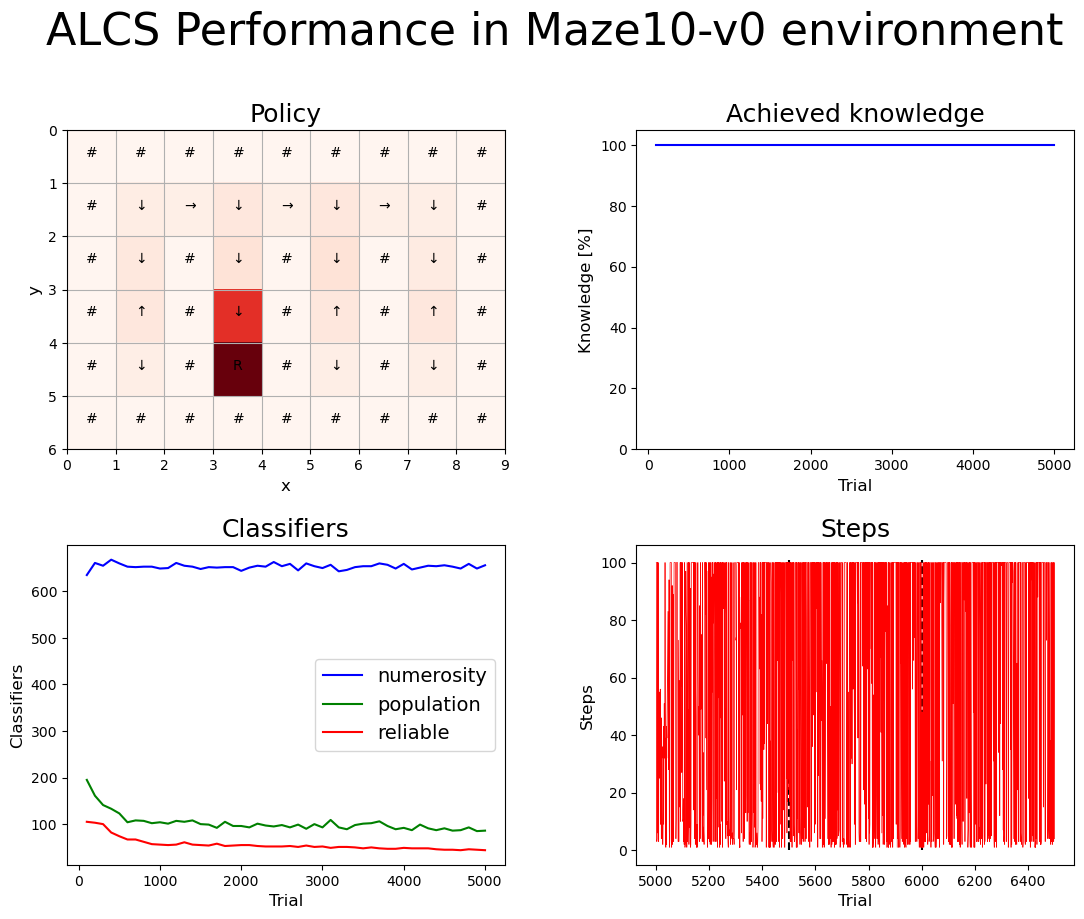

In [11]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_exploit = metrics_exploit_no_rl.copy()
for idx, item in enumerate(metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    metrics_exploit.append(tmp)
for idx, item in enumerate(metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    metrics_exploit.append(tmp)

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(agent_exploit_rl, maze, metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

In [12]:
avg_step_explore = 0
for trial in metrics_explore:
    avg_step_explore += trial['steps_in_trial']
avg_step_explore /= NUMBER_OF_EXPLORE_TRIALS / metrics_trial_frequency_explore
print("Average number of steps to solve the maze is ",avg_step_explore,
      " for a total of ", NUMBER_OF_EXPLORE_TRIALS, " trials in EXPLORATION")

avg_step_exploit_no_rl = 0
for trial in metrics_exploit_no_rl:
    avg_step_exploit_no_rl += trial['steps_in_trial']
avg_step_exploit_no_rl /= NUMBER_OF_EXPLOIT_TRIALS_NO_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_no_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_NO_RL, " trials in EXPLOITATION without Reinforcement Module")

avg_step_exploit_rl_start = 0
for trial in metrics_exploit_rl_start:
    avg_step_exploit_rl_start += trial['steps_in_trial']
avg_step_exploit_rl_start /= NUMBER_OF_EXPLOIT_TRIALS_RL_START
print("Average number of steps to solve the maze is ",avg_step_exploit_rl_start,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL_START, " trials in EXPLOITATION starting Reinforcement Module")

avg_step_exploit_rl = 0
for trial in metrics_exploit_rl:
    avg_step_exploit_rl += trial['steps_in_trial']
avg_step_exploit_rl /= NUMBER_OF_EXPLOIT_TRIALS_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL, " trials in EXPLOITATION with Reinforcement Module")

print(_maze_metrics(population_explore, maze))
print(_maze_metrics(population_exploit_no_rl, maze))
print(_maze_metrics(population_exploit_rl_start, maze))
print(_maze_metrics(population_exploit_rl, maze))

Average number of steps to solve the maze is  43.06  for a total of  5000  trials in EXPLORATION
Average number of steps to solve the maze is  53.896  for a total of  500  trials in EXPLOITATION without Reinforcement Module
Average number of steps to solve the maze is  62.1  for a total of  500  trials in EXPLOITATION starting Reinforcement Module
Average number of steps to solve the maze is  65.892  for a total of  500  trials in EXPLOITATION with Reinforcement Module
{'knowledge': 100.0, 'population': 79, 'numerosity': 649, 'reliable': 39}
{'knowledge': 100.0, 'population': 79, 'numerosity': 649, 'reliable': 39}
{'knowledge': 100.0, 'population': 79, 'numerosity': 649, 'reliable': 39}
{'knowledge': 100.0, 'population': 79, 'numerosity': 649, 'reliable': 39}


In [13]:
population_exploit_rl.sort(key=lambda cl: -cl.fitness)
population_exploit_rl_to_display = [cl for cl in population_exploit_rl
    if cl.does_match("01110111")]
print(len(population_exploit_rl_to_display))
print("\n")
for cl in population_exploit_rl_to_display:
    print(cl)
    print("\n")

25


0####### 6 ########
q: 1.0    r: 705.5  ir: 0.0    f: 705.5  
exp: 11148 num: 10 ee: False
Mark: empty
tga: 241004 talp: 241088 tav: 17.98  



##1##### 2 ########
q: 1.0    r: 696.2  ir: 0.0    f: 696.2  
exp: 11972 num: 20 ee: False
Mark: empty
tga: 241026 talp: 241080 tav: 21.04  



######1# 6 ########
q: 1.0    r: 696.0  ir: 0.0    f: 696.0  
exp: 12556 num: 10 ee: False
Mark: empty
tga: 241004 talp: 241098 tav: 16.54  



#######1 7 ########
q: 1.0    r: 688.5  ir: 0.0    f: 688.5  
exp: 11959 num: 20 ee: False
Mark: empty
tga: 240993 talp: 241049 tav: 22.37  



#1###### 1 ########
q: 1.0    r: 683.6  ir: 0.0    f: 683.6  
exp: 11375 num: 20 ee: False
Mark: empty
tga: 241019 talp: 241079 tav: 20.98  



#####1## 5 ########
q: 1.0    r: 681.7  ir: 0.0    f: 681.7  
exp: 12490 num: 15 ee: False
Mark: empty
tga: 241038 talp: 241096 tav: 21.68  



####0### 5 ########
q: 1.0    r: 667.0  ir: 0.0    f: 667.0  
exp: 10743 num: 6 ee: False
Mark: empty
tga: 240913 talp: 241096 tav: